In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
data = np.array([
    [1, 3, 0.5, 2.5], # Day 1: [open, high, low, close]
    [2.5, 4, 2, 3.5],
    [3.5, 5, 3, 4.5],
    [4.5, 6, 4, 5.5],
    [5.5, 6.5, 5, 6],
    [6, 7, 5.5, 6.5],
    [6.5, 8, 6, 7],
    [7, 8.5, 6.5, 7.5],
    [7.5, 9, 7, 8],
    [8, 9.5, 7.5, 8.5] # Day 10: [open, high, low, close]
])

# Parameters
num_points = 100
slope = 0.5
noise_stddev = 0.5

# Generate data
generated_data = np.zeros((num_points, 4))
generated_data[:10, :] = data  # Initialize with your data

for i in range(10, num_points):
    open_price = generated_data[i-1, 3] + slope + np.random.normal(0, noise_stddev)
    close_price = open_price + np.random.normal(0, noise_stddev)
    high_price = max(open_price, close_price) + np.random.uniform(0, 0.5)
    low_price = min(open_price, close_price) - np.random.uniform(0, 0.5)
    
    generated_data[i, :] = [open_price, high_price, low_price, close_price]
generated_data

array([[ 1.        ,  3.        ,  0.5       ,  2.5       ],
       [ 2.5       ,  4.        ,  2.        ,  3.5       ],
       [ 3.5       ,  5.        ,  3.        ,  4.5       ],
       [ 4.5       ,  6.        ,  4.        ,  5.5       ],
       [ 5.5       ,  6.5       ,  5.        ,  6.        ],
       [ 6.        ,  7.        ,  5.5       ,  6.5       ],
       [ 6.5       ,  8.        ,  6.        ,  7.        ],
       [ 7.        ,  8.5       ,  6.5       ,  7.5       ],
       [ 7.5       ,  9.        ,  7.        ,  8.        ],
       [ 8.        ,  9.5       ,  7.5       ,  8.5       ],
       [ 8.06712431,  8.13217871,  7.38958615,  7.51708414],
       [ 7.86080094,  9.30924569,  7.5331676 ,  8.84614008],
       [ 9.6245585 , 10.07274851,  9.42923009,  9.98096507],
       [ 9.66418102,  9.89656805,  9.60147884,  9.71558072],
       [10.05361758, 10.3613474 ,  9.4632995 ,  9.93651666],
       [10.65232669, 11.06405244, 10.26612452, 10.29024673],
       [11.63230211, 11.

In [4]:
# Create a date range
date_range = pd.date_range(start='2021-01-01', end='2021-04-10', freq='D')

# Create a DataFrame using the date range and numpy array
df = pd.DataFrame(data=generated_data, index=date_range, columns=["Open", "High", "Low", "Close"])
df

,Open,High,Low,Close
2021-01-01,1.000000,3.000000,0.500000,2.500000
2021-01-02,2.500000,4.000000,2.000000,3.500000
2021-01-03,3.500000,5.000000,3.000000,4.500000
2021-01-04,4.500000,6.000000,4.000000,5.500000
2021-01-05,5.500000,6.500000,5.000000,6.000000
...,...,...,...,...
2021-04-06,56.371944,56.743648,55.193901,55.600621
2021-04-07,55.900035,56.506135,55.886706,56.075191
2021-04-08,56.820699,57.073180,56.147083,56.445542
2021-04-09,57.733372,57.893008,57.093939,57.513827


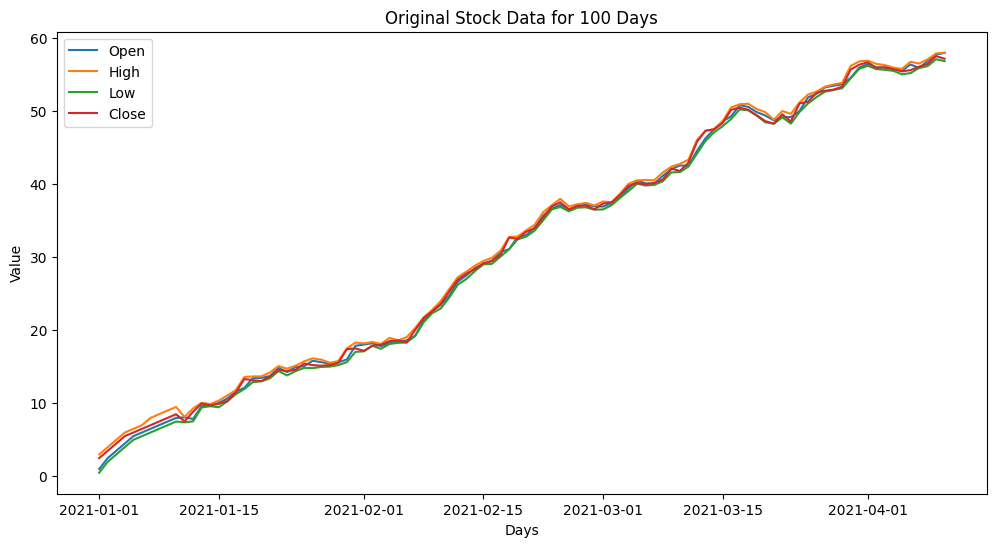

In [5]:
# Plotting the original 4 features
features = ['Open', 'High', 'Low', 'Close']
plt.figure(figsize=(12,6))
for feature in features:
    plt.plot(df[feature], label=feature)
plt.title('Original Stock Data for 100 Days')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Value')
plt.show()

In [6]:
# Normalizing the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_normalized, columns = df.columns, index=date_range)
df_scaled 

,Open,High,Low,Close
2021-01-01,0.000000,0.000000,0.000000,0.000000
2021-01-02,0.026337,0.018187,0.026505,0.018177
2021-01-03,0.043894,0.036375,0.044174,0.036354
2021-01-04,0.061452,0.054562,0.061844,0.054532
2021-01-05,0.079010,0.063656,0.079514,0.063620
...,...,...,...,...
2021-04-06,0.972204,0.977461,0.966427,0.965223
2021-04-07,0.963919,0.973141,0.978669,0.973850
2021-04-08,0.980083,0.983454,0.983269,0.980582
2021-04-09,0.996108,0.998365,1.000000,1.000000


In [7]:
# # Creating sequences of 10 days
# X = []
# y = []

# time_steps = 1
# for i in range(0, len(df_scaled) - time_steps):
#     X.append(df_scaled.iloc[i:i+time_steps])
#     y.append(df_scaled.iloc[i+time_steps])

# print("Start x")
# # print(X)
# print("Start y")
# print(y)

In [8]:
# # Splitting the data into training and testing (75% training, 25% testing)
# train_size = int(0.7 * len(X))
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]
# print("X_train")
# print(len(X_train))
# print("X_test")
# print(len(X_test))
# print("y_train")
# print(y_train)
# print("y_test")
# print(y_test)

In [9]:
endog_variable = "Close"
exog_variable = ["Open", "High", "Low"]
model = ARIMA(df_scaled[endog_variable], order = (1, 1, 1), exog=df_scaled[exog_variable])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 414.371
Date:                Thu, 21 Sep 2023   AIC                           -816.741
Time:                        16:14:28   BIC                           -801.170
Sample:                    01-01-2021   HQIC                          -810.441
                         - 04-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.7802      0.087     -8.969      0.000      -0.951      -0.610
High           0.8688      0.042     20.752      0.000       0.787       0.951
Low            0.9095      0.093      9.764      0.000       0.727       1.092
ar.L1         -0.0772      0.225     -0.343      0.731      -0.518       0.364
ma.L1         -0.3778      0.232     -1.632      0.103      -0.832       0.076
sigma2       1.35e-05   2.15e-06      6.269      0.000    9.28e-06    1.77e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.87   Prob(JB):                         0.72
Heteroskedasticity (H):               1.18   Skew:                            -0.05
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
import warnings
warnings.filterwarnings('default')

In [13]:
y_pred = []

endog_variable = "Close"
exog_variable = ["Open", "High", "Low"]

history = df_scaled.iloc[:11]
model = ARIMA(endog=history[endog_variable], order = (1,1,1))
test = model.fit().forecast(steps=1)
print(type(history))
print(type(test))
y_pred.append(test[0])
for i in range(11, len(df_scaled)):    
    history = pd.concat([history, df_scaled.iloc[i].to_frame().T])
    model = ARIMA(endog=history[endog_variable], order = (1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)    
    y_pred.append(output[0])
y_pred.pop() 
error = mean_squared_error(y_pred, df_scaled.iloc[11:]["Close"])
print('Train MSE: %.7f' % error)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_d

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.

Train MSE: 0.0002594


In [390]:
model_fit = model.fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 286.532
Date:                Thu, 21 Sep 2023   AIC                           -567.064
Time:                        14:50:12   BIC                           -559.278
Sample:                    01-01-2021   HQIC                          -563.914
                         - 04-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    978.498      0.000       0.998       1.002
ma.L1         -0.9978      0.304     -3.279      0.001      -1.594      -0.401
sigma2         0.0002   4.95e-05      3.452      0.001    7.38e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.08
Prob(Q):                              0.68   Prob(JB):                         0.21
Heteroskedasticity (H):               0.82   Skew:                            -0.35
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

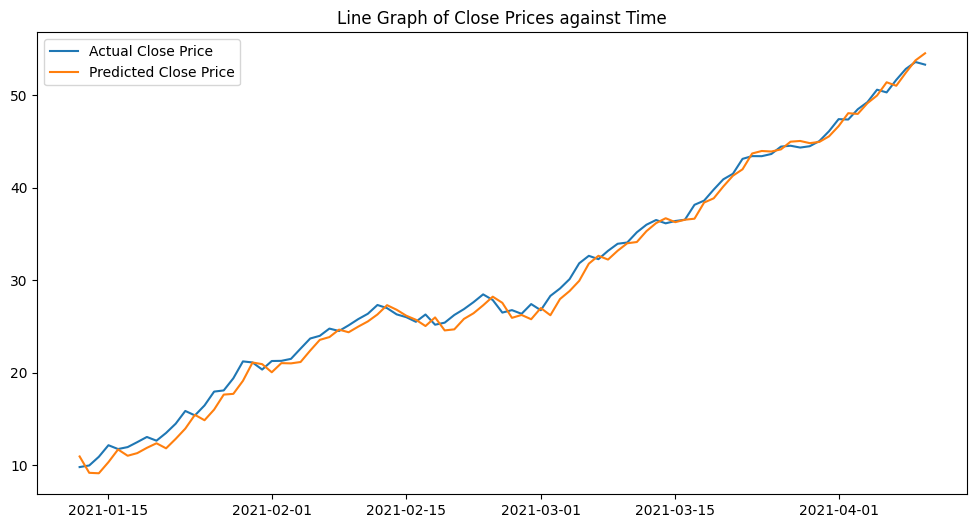

In [391]:
# Original Close Prices
y = df.iloc[11:]["Close"]

# Predicted Close Prices
y_pred_df = pd.DataFrame(y_pred, index=y.index)
dummy_column = pd.DataFrame(np.ones(y_pred_df.shape))
y_pred_dummy = pd.concat([y_pred_df, dummy_column, dummy_column, dummy_column], axis = 1)
y_pred_df_actual = scaler.inverse_transform(y_pred_dummy)[:89, 0]
y_pred_df_actual = pd.DataFrame(y_pred_df_actual, index=y.index)
plt.figure(figsize=(12,6))
plt.title("Line Graph of Close Prices against Time")
plt.plot(y, label = "Actual Close Price")
plt.plot(y_pred_df_actual, label = "Predicted Close Price")
plt.legend()
plt.show()